In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("Set up complete")

Set up complete


In [7]:
data = pd.read_csv("Bus_Ticket_price.csv")
data.head()

,Bus_Name,distence_km,tiket_price
0,Praime,50,100
1,Praime,51,100
2,Praime,52,100
3,Praime,53,100
4,Praime,54,100


In [12]:
data.columns

Index(['Bus_Name', 'distence_km', 'tiket_price'], dtype='object')

In [13]:
data["Bus_Name"].value_counts()

Bus_Name
BRTC      156
Praime     43
Name: count, dtype: int64

In [11]:
bus_name = pd.get_dummies(data["Bus_Name"],dtype = int,drop_first = True)
bus_name


,Praime
0,1
1,1
2,1
3,1
4,1
...,...
194,0
195,0
196,0
197,0


In [12]:
data = pd.concat([data,bus_name],axis = 1)

In [13]:
data

,Bus_Name,distence_km,tiket_price,Praime
0,Praime,50,100,1
1,Praime,51,100,1
2,Praime,52,100,1
3,Praime,53,100,1
4,Praime,54,100,1
...,...,...,...,...
194,BRTC,181,200,0
195,BRTC,182,200,0
196,BRTC,183,200,0
197,BRTC,184,200,0


In [14]:

data.drop("Bus_Name",axis = 1,inplace = True)

data

,distence_km,tiket_price,Praime
0,50,100,1
1,51,100,1
2,52,100,1
3,53,100,1
4,54,100,1
...,...,...,...
194,181,200,0
195,182,200,0
196,183,200,0
197,184,200,0


In [15]:
data.head()

,distence_km,tiket_price,Praime
0,50,100,1
1,51,100,1
2,52,100,1
3,53,100,1
4,54,100,1


#### Spliting data into train and test data -

##### Independent Data -

In [30]:
X = data[[ 'distence_km']]
y = data["tiket_price"]

In [31]:
X

,distence_km
0,50
1,51
2,52
3,53
4,54
...,...
194,181
195,182
196,183
197,184


In [39]:
y

0      100
1      100
2      100
3      100
4      100
      ... 
194    200
195    200
196    200
197    200
198    200
Name: tiket_price, Length: 199, dtype: int64

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle = True,random_state = 42)

In [33]:
X_train.size

159

In [34]:
X_test.size

40

In [35]:
y_train.size

159

In [36]:
y_test.size

40

In [18]:
model = LinearRegression()

In [37]:
model.fit(X_train,y_train)

LinearRegression()

In [50]:
X.shape

(199, 2)

In [51]:
y.shape

(199,)

In [38]:
model.coef_

array([0.80195438])

In [39]:
X.columns

Index(['distence_km'], dtype='object')

In [40]:
pd.DataFrame(model.coef_,index = X.columns , columns = ["Coefficient/Slop"])

,Coefficient/Slop
distence_km,0.801954


In [41]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [42]:
X_train[:3]

,distence_km
183,170
38,88
24,74


In [43]:
X_test[:3]

,distence_km
82,69
15,65
111,98


In [58]:
y_train[:3]

183    165
38     120
24     115
Name: tiket_price, dtype: int64

In [44]:
y_test[:3]

82      60
15     110
111     90
Name: tiket_price, dtype: int64

In [45]:
y_pred_train[:3]

array([166.16706926, 100.40680983,  89.17944846])

In [46]:
y_pred_test[:3]

array([ 85.16967655,  81.96185901, 108.42635366])

##### Errors -

In [47]:
mean_squared_error(y_train,y_pred_train)

np.float64(269.2273371384448)

In [48]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

np.float64(16.408148498183603)

In [49]:
mean_absolute_error(y_train,y_pred_train)

np.float64(14.33432236678666)

In [50]:
r2_score(y_train,y_pred_train)

0.8134358395946275

In [57]:
def training_evaluation(actual,predicted):

    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2  = r2_score(actual,predicted)

    print(f"MSE : {mse}")
    print(f"RMSE : {rmse}")
    print(f"MAE : {mae}")
    print(f"R2 : {r2}")


    plt.scatter(actual,predicted,color = "r" , label = "Actual Price")
    plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],color = "k" , lw = 2 , label = "Predicted Price")
    plt.title("Best fit line = Training Data")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.show()

MSE : 269.2273371384448
RMSE : 16.408148498183603
MAE : 14.33432236678666
R2 : 0.8134358395946275


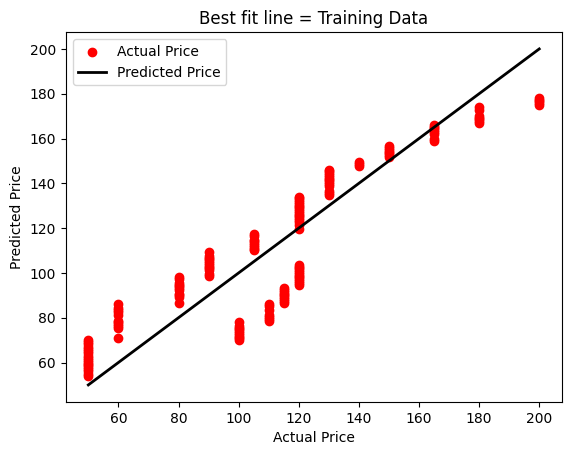

In [58]:
training_evaluation(y_train,y_pred_train)

##### Preparing data -

In [54]:
def test_evaluation(actual,predicted):

    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2  = r2_score(actual,predicted)

    print(f"MSE : {mse}")
    print(f"RMSE : {rmse}")
    print(f"MAE : {mae}")
    print(f"R2 : {r2}")


    plt.scatter(actual,predicted,color = "g" , label = "Actual Price")
    plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],color = "k" , lw = 2 , label = "Predicted Price")
    plt.title("Best fit line = Testing Data")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.show()

MSE : 208.37892416501535
RMSE : 14.435335956084131
MAE : 12.374823476745973
R2 : 0.8716569838942847


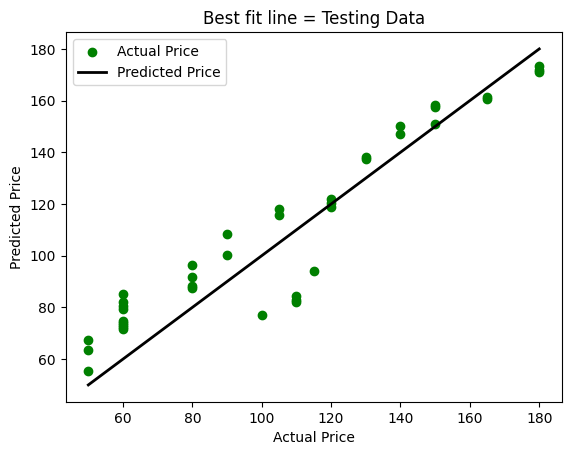

In [56]:
test_evaluation(y_test,y_pred_test)

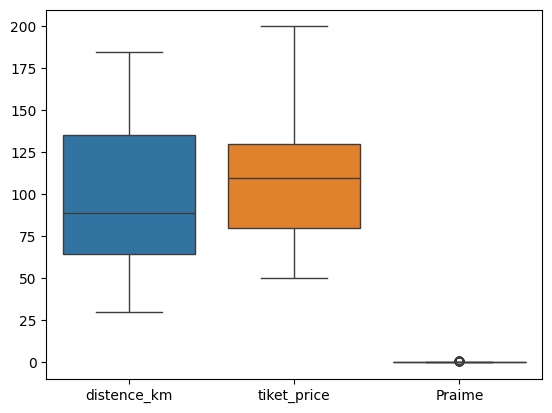

In [29]:
sns.boxplot(data)
plt.show()

<Axes: ylabel='Count'>

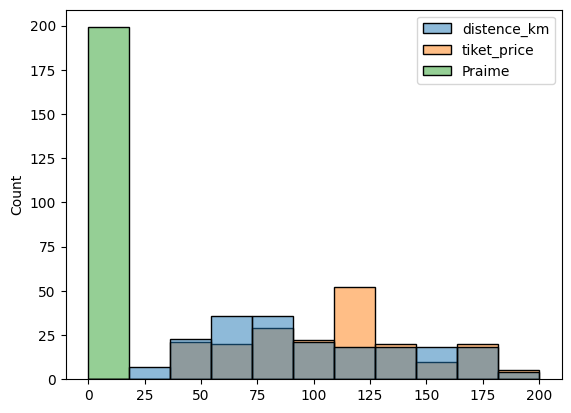

In [59]:
sns.histplot(data)

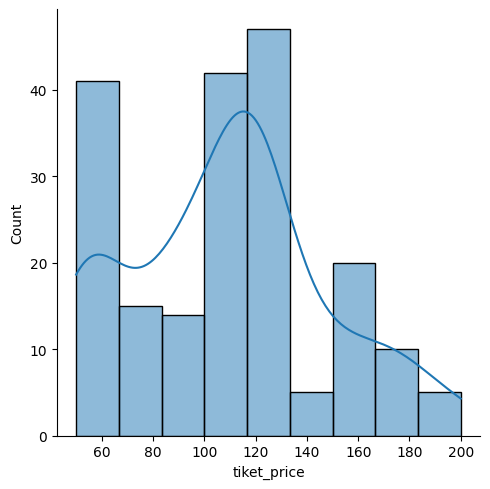

In [61]:
sns.displot(data["tiket_price"],kde = True)

<Axes: >

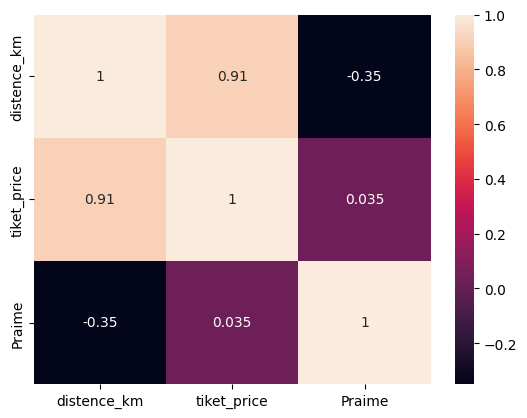

In [64]:
sns.heatmap(data.corr(),annot = True)

<Axes: >

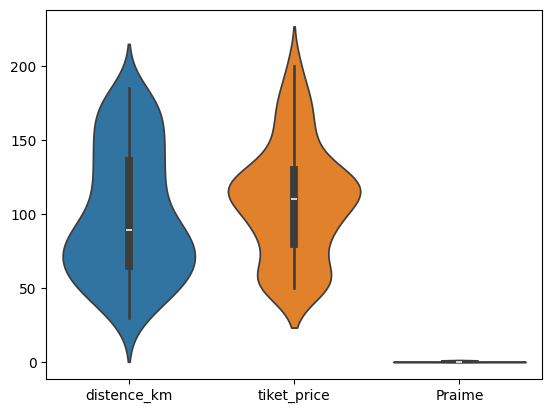

In [65]:
sns.violinplot(data)

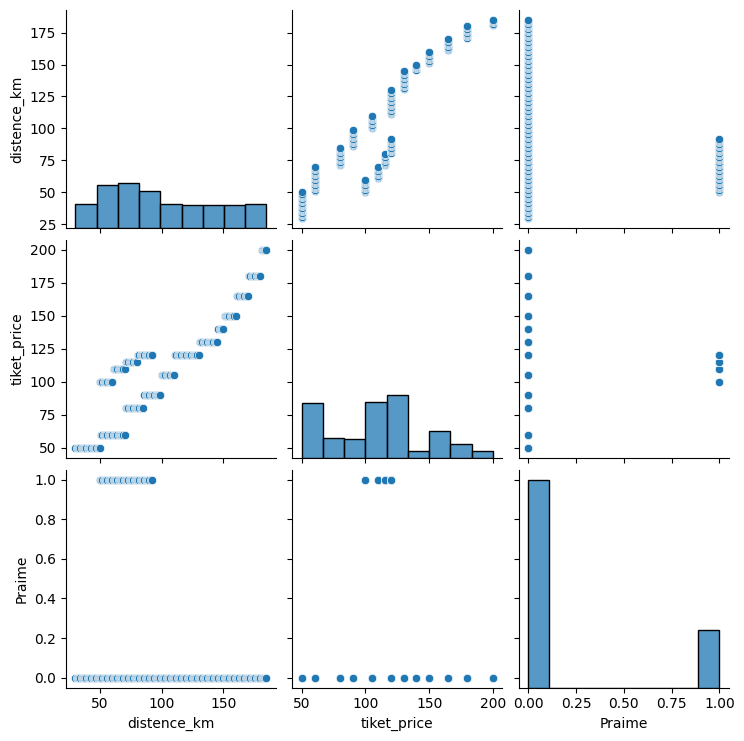

In [66]:
sns.pairplot(data)